In [1]:
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Data Loader

In [2]:
cancer = datasets.load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

### Data Shuffle, Model Generator, Training

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### 정확도

In [4]:
print("훈련세트 정확도 : {:3f}".format(model.score(X_train, y_train)))
print("테스트세트 정확도 : {:3f}".format(model.score(X_test, y_test)))

# OverFitting
# 훈련은 잘했으나 테스트에서 차이가 생김

# 훈련세트 정확도가 100% 나왔다는 것은 제대로 훈련을 했다는 것이 아닌 단순 암기를 했다는 것을 의미한다.
# 밑의 가치치기에서 훈련세트 정확도가 낮아진 것은 암기가 아닌 제대로 훈련을 하였단 것을 의미하며
# 최종적으로 훈련의 판단은 테스트 세트로 판단하는 것이 더 정확하다.
# 두 코드에서 테스트 정확도가 올라갔단 것은 매우 좋은 징조이며 훈련이 잘 되었다는 것이다.

훈련세트 정확도 : 1.000000
테스트세트 정확도 : 0.930070


### 가지치기

In [10]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

print("훈련세트 정확도 : {:3f}".format(model.score(X_train, y_train)))
print("테스트세트 정확도 : {:3f}".format(model.score(X_test, y_test)))

훈련세트 정확도 : 0.995305
테스트세트 정확도 : 0.951049


### 특성중요도
    - 특성의 라벨링이 없기 때문에 시각화 필요
    - 특성 중요도는 백분율이기 때문에 합은 1

In [6]:
print("특성중요도 : \n{}".format(model.feature_importances_))

특성중요도 : 
[0.         0.         0.         0.         0.         0.
 0.         0.73943775 0.         0.         0.013032   0.
 0.         0.         0.         0.         0.         0.01737208
 0.00684355 0.         0.06019401 0.11783988 0.         0.03522339
 0.01005736 0.         0.         0.         0.         0.        ]


In [7]:
import matplotlib.pyplot as plt
import numpy as np

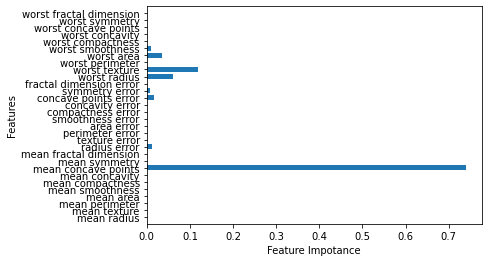

In [8]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('Feature Impotance')
    plt.ylabel('Features')
    plt.ylim(-1, n_features) # 그림의 범위를 수동으로 지정할때
    
plot_feature_importances_cancer(model)

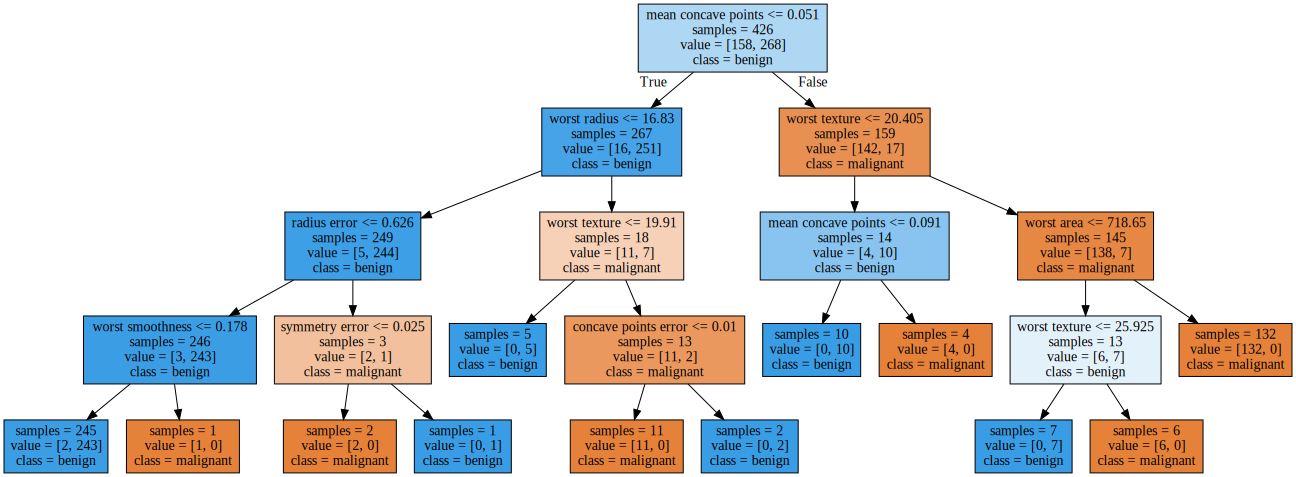

'cancer_tree.png.pdf'

In [9]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='cancer_tree.dot',
                class_names=cancer.target_names,
                feature_names=cancer.feature_names,
                impurity=False,
                filled = True) 

with open('cancer_tree.dot', encoding='utf-8') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
display(dot)
dot.render(filename='cancer_tree.png')